In [1]:
import rpy2.robjects as robjects
import pandas as pd
import numpy as np
import os

In [2]:
# Define the path to the data folder
data_path = "sessions"

# Function to read RDS file
def read_rds(file_path):
    readRDS = robjects.r['readRDS']
    return readRDS(file_path)

# load all sessions
sessions = []
for i in range(1, 19):
    file_name = f'session{i}.rds'
    file_path = os.path.join(data_path, file_name)
    session_data = read_rds(file_path)
    sessions.append(session_data)

In [3]:
# Initialize a list to store session summaries
session_summaries = []

# Process each session
for i in sessions:
    # Extract session metadata
    mouse_name = i.rx2('mouse_name')[0]
    date_exp = i.rx2('date_exp')[0]
    
    # Extract neural data
    spks = i.rx2('spks')  # Spike trains (list of matrices)
    # Convert R matrix to numpy array for the first trial
    first_trial_spks = np.array(spks[0])
    n_neurons = first_trial_spks.shape[0]  # Number of neurons (rows in the spike matrix)
    n_trials = len(spks)  # Number of trials (length of the list)
    # Extract feedback data
    feedback_type = np.array(i.rx2('feedback_type'))  # Feedback type (1 or -1)
    success_rate = np.mean(feedback_type == 1)  # Success rate
    
    # Extract brain area data
    brain_area = np.array(i.rx2('brain_area'))  # Convert to numpy array
    n_brain_area = len(np.unique(brain_area))  # Number of unique brain areas
    
    # Append session summary to the list
    session_summaries.append({
        "mouse_name": mouse_name,
        "date_exp": date_exp,
        "n_brain_area": n_brain_area,
        "n_neurons": n_neurons,
        "n_trials": n_trials,
        "success_rate": success_rate
    })

# Convert to DataFrame for easier analysis
session_summary_df = pd.DataFrame(session_summaries)

In [4]:
session_summary_df

,mouse_name,date_exp,n_brain_area,n_neurons,n_trials,success_rate
0,Cori,2016-12-14,8,734,114,0.605263
1,Cori,2016-12-17,5,1070,251,0.633466
2,Cori,2016-12-18,11,619,228,0.662281
3,Forssmann,2017-11-01,11,1769,249,0.666667
4,Forssmann,2017-11-02,10,1077,254,0.661417
5,Forssmann,2017-11-04,5,1169,290,0.741379
6,Forssmann,2017-11-05,8,584,252,0.670635
7,Hench,2017-06-15,15,1157,250,0.644000
8,Hench,2017-06-16,12,788,372,0.685484
9,Hench,2017-06-17,13,1172,447,0.619687


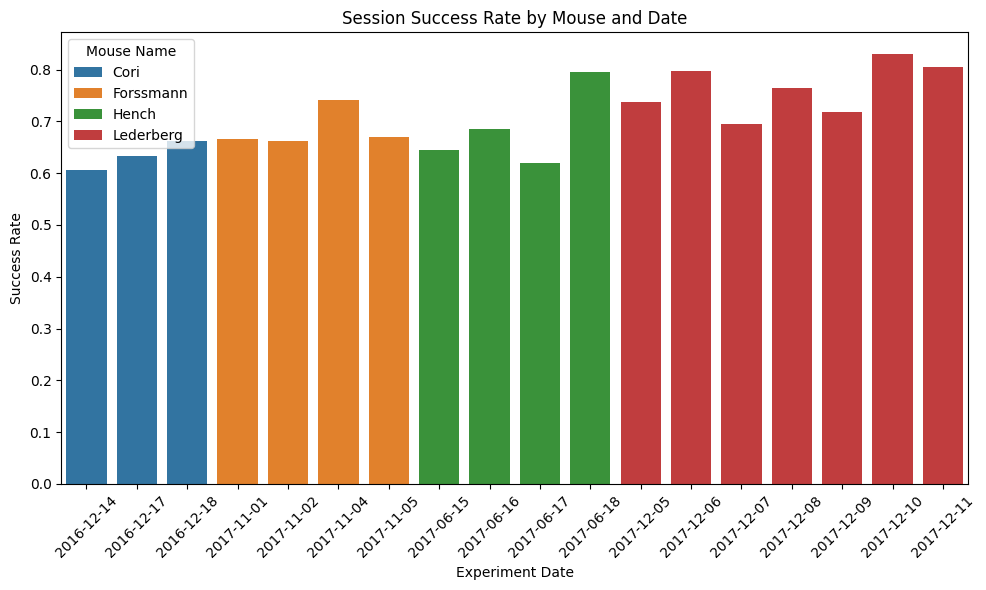

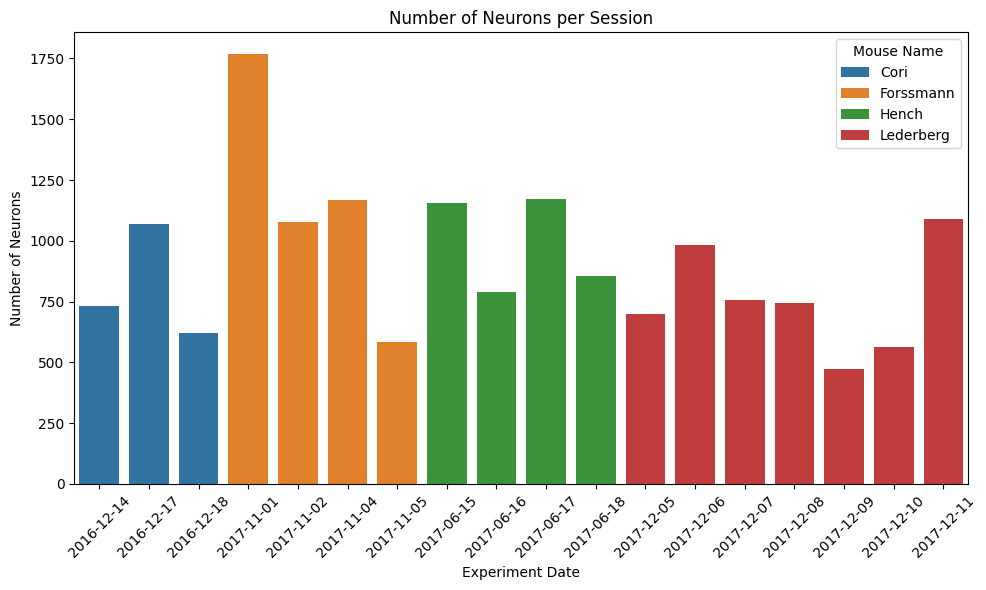

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for success rate per session
plt.figure(figsize=(10, 6))
sns.barplot(x="date_exp", y="success_rate", hue="mouse_name", data=session_summary_df)
plt.title("Session Success Rate by Mouse and Date")
plt.xlabel("Experiment Date")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.legend(title="Mouse Name")
plt.tight_layout()
plt.show()

# Bar plot for number of neurons per session
plt.figure(figsize=(10, 6))
sns.barplot(x="date_exp", y="n_neurons", hue="mouse_name", data=session_summary_df)
plt.title("Number of Neurons per Session")
plt.xlabel("Experiment Date")
plt.ylabel("Number of Neurons")
plt.xticks(rotation=45)
plt.legend(title="Mouse Name")
plt.tight_layout()
plt.show()

In [6]:
session_summary_df

,mouse_name,date_exp,n_brain_area,n_neurons,n_trials,success_rate
0,Cori,2016-12-14,8,734,114,0.605263
1,Cori,2016-12-17,5,1070,251,0.633466
2,Cori,2016-12-18,11,619,228,0.662281
3,Forssmann,2017-11-01,11,1769,249,0.666667
4,Forssmann,2017-11-02,10,1077,254,0.661417
5,Forssmann,2017-11-04,5,1169,290,0.741379
6,Forssmann,2017-11-05,8,584,252,0.670635
7,Hench,2017-06-15,15,1157,250,0.644000
8,Hench,2017-06-16,12,788,372,0.685484
9,Hench,2017-06-17,13,1172,447,0.619687


In [7]:
import numpy as np

# Select one session to inspect
session = sessions[0]  # Change index to explore different sessions

# Extract spike data (list of matrices, one per trial)
spks_list = session.rx2('spks')

# Convert all trials into a 3D NumPy array (trials x neurons x time bins)
spks_array = np.array([np.array(trial) for trial in spks_list])

# Print the shape to understand structure
print(f"Spike Data Shape: {spks_array.shape}")  # (n_trials, n_neurons, n_time_bins)

# Preview the first trial's spike train
print(spks_array[0])  # First trial (neuron x time_bin)

Spike Data Shape: (114, 734, 40)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
zero_percentage = np.mean(spks_array[0] == 0) * 100
print(f"Percentage of zeroes in first trial: {zero_percentage:.2f}%")

Percentage of zeroes in first trial: 96.26%


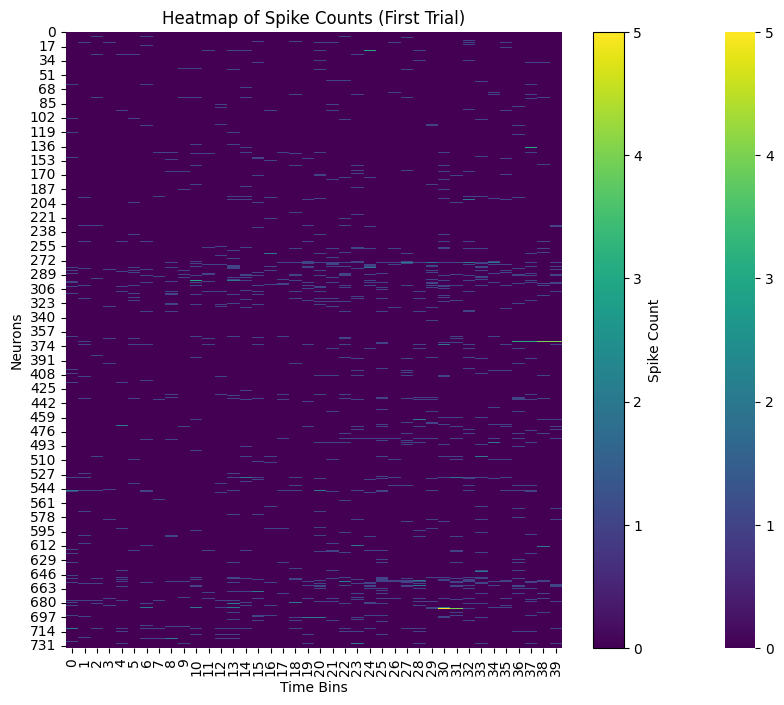

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the data is a NumPy array
trial_spks = np.array(spks_array[0])  # First trial (Neurons x TimeBins)

# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(trial_spks, cmap="viridis", cbar=True)  # Ensure cbar=True
ax.figure.colorbar(ax.collections[0], label="Spike Count")

plt.xlabel("Time Bins")
plt.ylabel("Neurons")
plt.title("Heatmap of Spike Counts (First Trial)")
plt.show()